In [1]:
%matplotlib inline
import galpy
import numpy as np
import scipy as sp
from matplotlib.pylab import plt, xlim, ylim
from astropy import units as u

In [2]:
from galpy.df import streamdf
from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential, MWPotential2014, ChandrasekharDynamicalFrictionForce
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import conversion #for unit conversions

In [15]:
#We establish the potentials used for the simulation
#For now, we will use MWPotential2014, a combination of the bulge, halo, and disk models
mw = MWPotential2014[2]*1.5

#To see if dynamical friction matters, we also set up that potential
#This potential depends on the mass of the galaxy and the half mass radius, which are from Mateo et. al 2008
M_proj = 7.*10.**8.*u.Msun #Virial mass 
halfmass_radius = 0.370*u.kpc #Sersic radius 
cdf = ChandrasekharDynamicalFrictionForce(GMs=M_proj,rhm=halfmass_radius,
                                             dens=MWPotential2014)


In [16]:
#Make/Initialize an orbit with current data from Leo I
#Find out where astroquery gets its data from for citation purposes
obs = Orbit.from_name('Leo I')

#List 3D position and velocity
#orbit.Orbit() saves its conditions. Since it hasn't been integrated, there is only one condition
#Orbit.<param>()
obs.ra(), obs.dec(), obs.dist(), obs.vlos(), obs.vra(), obs.vdec()

(152.1146,
 12.30589999999999,
 258.2,
 282.90000000000003,
 -61.65593053184495,
 -146.66621586613465)

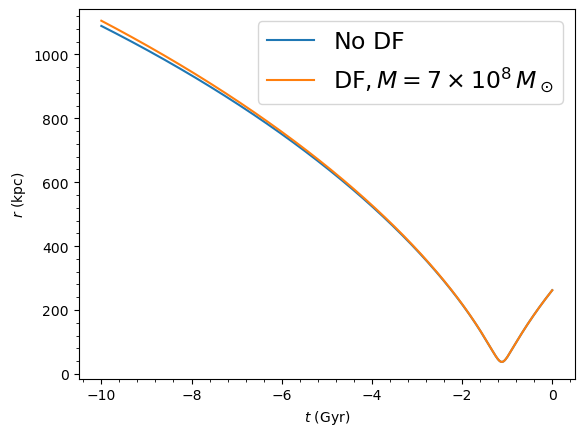

In [17]:
#Now we want to initiate the orbit and find out where Leo I was in the past
#Initiate time array that goes 10 Gyr to the past
ts = np.linspace(0.,-10.,1001)*u.Gyr

#Solve for the orbit in the specified potential given the established initial positions
#Plain MW potential
obs.integrate(ts,MWPotential2014)

#Dynamical Friction potential
odf = obs()
odf.integrate(ts,MWPotential2014 + cdf)

#Plotting
obs.plot(d1='t',d2='r',label=r'$\mathrm{No\ DF}$')
odf.plot(d1='t',d2='r',overplot=True,label=r'$\mathrm{DF}, M=7\times10^{8}\,M_\odot$')
plt.legend(fontsize=17.)

In [64]:
#We get the positions/velocities at any time using the syntax
#Orbit.<param>(<time>)
pos_past = np.asarray([obs.ra(-10.*u.Gyr), obs.dec(-10.*u.Gyr), obs.dist(-10.*u.Gyr)])
vel_past = np.asarray([obs.vlos(-10.*u.Gyr), obs.vra(-10.*u.Gyr), obs.vdec(-10.*u.Gyr)])
print(pos_past, vel_past)

[ 337.26759947   36.06614671 1088.95024979] [-286.84255537   61.58222451  -66.40339288]


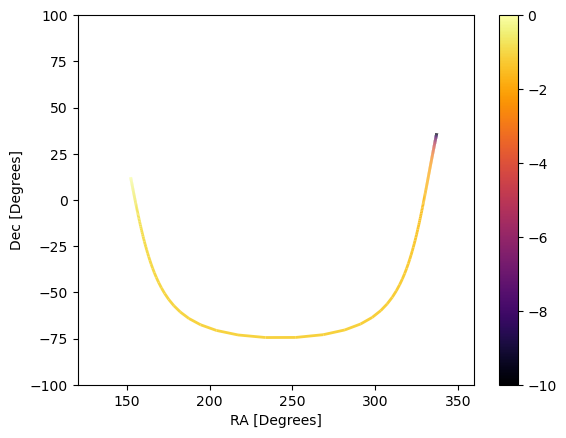

In [19]:
#Copy code from here...
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html 
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = obs.ra(ts)
y = obs.dec(ts)
times = np.linspace(0.,-10.,1001)
#also make plot in terms of distance
#times = obs.dist(ts)

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

#fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig, ax = plt.subplots(1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(times.min(), times.max())
lc = LineCollection(segments, cmap='inferno', norm=norm)
# Set the values used for colormapping
lc.set_array(times)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

# Use a boundary norm instead
#cmap = ListedColormap(['r', 'g', 'b'])
#norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
#lc = LineCollection(segments, cmap=cmap, norm=norm)
#lc.set_array(times)
#lc.set_linewidth(2)
#line = axs[1].add_collection(lc)
#fig.colorbar(line, ax=axs[1])

ax.set_xlabel("RA [Degrees]")
ax.set_ylabel("Dec [Degrees]")
ax.set_xlim(120, 360)
ax.set_ylim(-100, 100)
plt.show()

In [20]:
#We do the same for dynamical friction
pos_past_df = [odf.ra(-10.*u.Gyr), odf.dec(-10.*u.Gyr), odf.dist(-10.*u.Gyr)]
vel_past_df = [odf.vlos(-10.*u.Gyr), odf.vra(-10.*u.Gyr), odf.vdec(-10.*u.Gyr)]

In [21]:
from matplotlib import cm, colors
time = cm.ScalarMappable(norm=colors.Normalize(ts.min(), ts.max()), cmap=cm.rainbow)

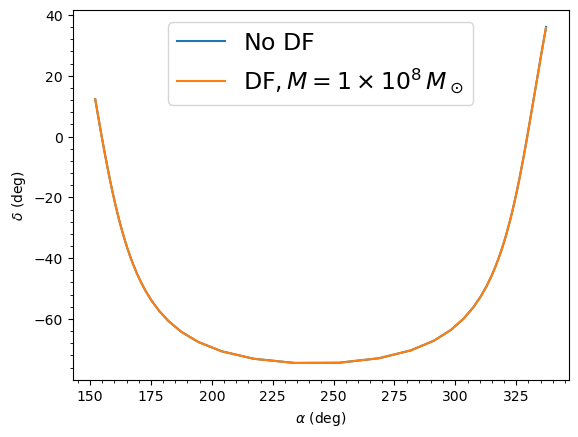

In [22]:
obs.plot(d1='ra',d2='dec',label=r'$\mathrm{No\ DF}$')
odf.plot(d1='ra',d2='dec',overplot=True,label=r'$\mathrm{DF}, M=1\times10^{8}\,M_\odot$')
# ylim(0.,660.)
plt.legend(fontsize=17.)

In [23]:
#how can we visualise the orbit as a function of time?

(-100.0, 360.0)

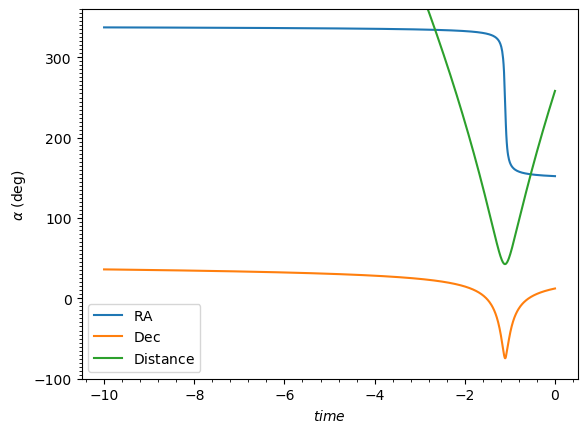

In [24]:
obs.plot(d1='time',d2='ra', label=r'$\rm RA$')
obs.plot(d1='time',d2='dec', overplot=True, label=r'$\rm Dec$')
obs.plot(d1='time',d2='dist', overplot=True, label=r'$\rm Distance$')
plt.legend()
plt.ylim(-100,360)

### Assignment #1
What were obs.ra(), obs.dec() at t = -10 Gyr? Use reference: https://docs.galpy.org/en/latest/orbit.html#example-the-orbit-of-the-large-magellanic-cloud-in-the-presence-of-dynamical-friction

### Assignment #2
Run the streamdf example initializing the Orbit object to have the values of Leo I 10 Gyr ago.  

In [66]:
#Value for velocity dispersion found in Mateo et. al 2008
sigv= 9.2 #km/s

#Estimation of action
aAI = actionAngleIsochroneApprox(pot=mw,b=0.8)

#Establish a new orbit object that was in the past:
obs_past = Orbit(pos_past/8+vel_past/220)

In [68]:
#Now run streamdf with this orbit, assuming sigv is constant

sdf= streamdf(sigv/220.,progenitor=obs_past, pot=mw,aA=aAI,leading=False,
              nTrackChunks=1,tdisrupt=4.5/conversion.time_in_Gyr(220.,8.))



OSError: Must specify phi for actionAngleIsochroneApprox